In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas

In [2]:
rawData = pd.read_csv('Data/ConsumptionData')
populationData = pd.read_csv('Data/PopulationData')
rawData1 = rawData.where(rawData["year"] == 2019).dropna()

In [3]:
def sortDictionary(d,itemNum,rev=True):
    return {k: v for k, v in sorted(d.items(), key=lambda item: item[itemNum],reverse=rev)}

In [4]:
fuelTypes = ["biofuel", "coal", "fossil", "gas", "hydro", "low_carbon", "nuclear", "oil", "solar", "wind"]

renewable = ["hydro","solar","wind"]
nonrenewable =  ["biofuel", "coal", "fossil", "gas", "low_carbon", "nuclear", "oil"]


In [5]:
countryConsumption = {}
for r in list(rawData1["country"]):
    for x in fuelTypes:
        if r not in countryConsumption.keys():
            countryConsumption[r] = 0.0
        countryConsumption[r] += float(rawData1[rawData1["country"] == r][x])    
        
countryConsumptionSorted = sortDictionary(countryConsumption,1)

In [6]:
print("Top 20 countries by consumption:")
for k,v in list(countryConsumptionSorted.items())[:20]:
    print("%-15s" %k,"%s" %round(v,3))

Top 20 countries by consumption:
China           78467.223
United States   52388.725
India           18859.193
Russia          16557.071
Japan           10271.199
CIS             9599.008
Canada          7869.94
Germany         7174.632
Iran            6857.666
South Korea     6837.165
Brazil          6751.504
Saudi Arabia    6130.856
France          5355.767
Indonesia       4911.821
Mexico          4270.11
United Kingdom  4265.136
Turkey          3570.58
Australia       3552.03
Italy           3483.315
Spain           3162.983


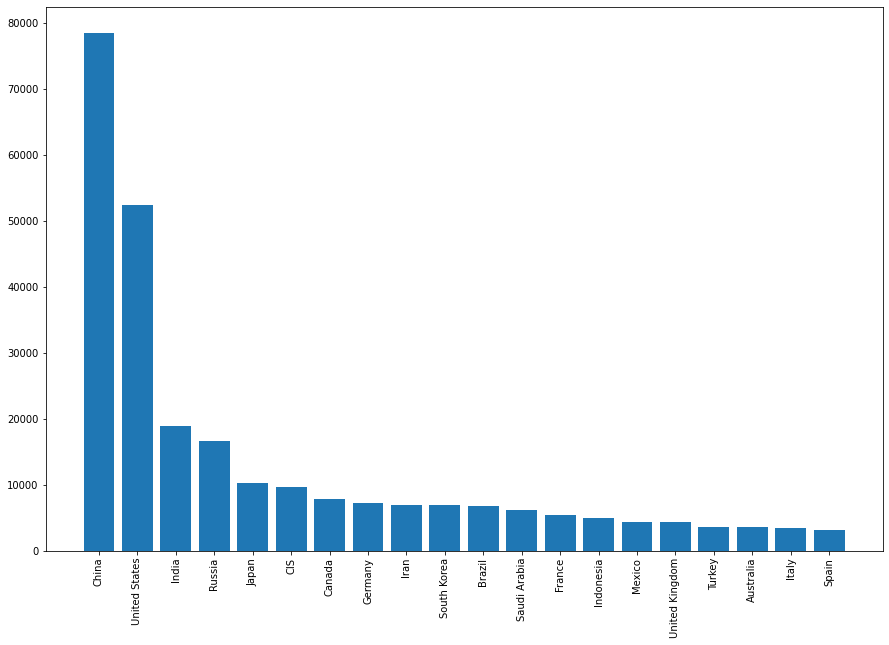

In [7]:
plt.figure(figsize=(15,10))
plt.bar(list(countryConsumptionSorted.keys())[:20], list(countryConsumptionSorted.values())[:20])
plt.xticks(rotation=90)
plt.show();

In [8]:
renewableC = {}
nonrenewableC = {}
for r in countryConsumptionSorted:
    for x in renewable:
        if r not in renewableC.keys():
            renewableC[r] = 0.0
        renewableC[r] += float(rawData1[rawData1["country"] == r][x])  
    for x in nonrenewable:
        if r not in nonrenewableC.keys():
            nonrenewableC[r] = 0.0
        nonrenewableC[r] += float(rawData1[rawData1["country"] == r][x])

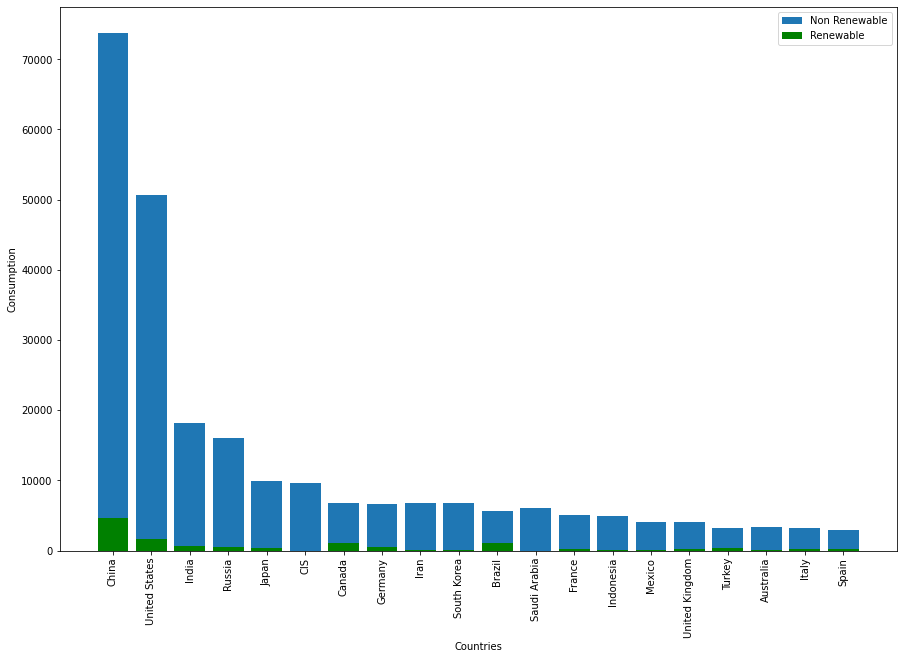

In [9]:
x = list(renewableC.keys())[:20]
non = list(nonrenewableC.values())[:20]
re = list(renewableC.values())[:20]

plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(x, non, label="Non Renewable")
ax.bar(x, re, color='g', label="Renewable")
ax.set_xlabel('Countries')
ax.set_ylabel('Consumption')
plt.xticks(rotation=90)
plt.legend()

plt.show();

In [10]:
population2019 = populationData.where(populationData["year"] == 2019).dropna()

In [11]:
countryPopulation = {}
for r in list(population2019["country"]):
    if r not in countryPopulation.keys():
        countryPopulation[r] = 0
    countryPopulation[r] = int(population2019[population2019["country"] == r]["population"])

In [12]:
correlation = np.corrcoef(list(countryConsumption.values()), list(countryPopulation.values()))
print("Correlation:\n")
print("%12s" %" ","%12s" %"Consumption", "%12s" %"Population")
print("%-12s" %"Consumption","%12f"%correlation[0][0],"%12f"%correlation[0][1])
print("%-12s" %"Population","%12f"%correlation[1][0],"%12f"%correlation[1][1])

Correlation:

              Consumption   Population
Consumption      1.000000     0.775228
Population       0.775228     1.000000


In [13]:
countryPopulationSorted = sortDictionary(countryPopulation,1)

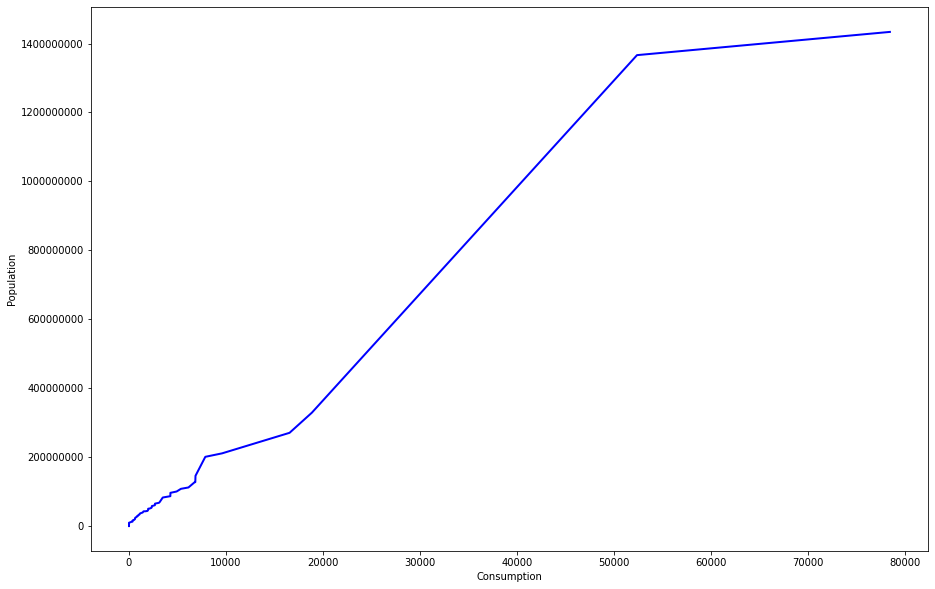

In [14]:
plt.figure(figsize=(15,10))
plt.plot(list(countryConsumptionSorted.values()),list(countryPopulationSorted.values()),color="b", linewidth=2)
plt.xlabel("Consumption")
plt.ylabel("Population")
plt.ticklabel_format(style='plain')
plt.show();

In [15]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
world['name'].mask(world['name'] == 'W. Sahara', 'Western Sahara', inplace=True)
world['name'].mask(world['name'] == 'United States of America', 'United States', inplace=True)
world['name'].mask(world['name'] == 'Macedonia', 'North Macedonia', inplace=True)
world['name'].mask(world['name'] == 'Bosnia and Herz.', 'Bosnia and Herzegovina', inplace=True)
world['name'].mask(world['name'] == 'S. Sudan', 'South Sudan', inplace=True)
world['name'].mask(world['name'] == 'Dem. Rep. Congo', 'Democratic Republic of Congo', inplace=True)
world['name'].mask(world['name'] == 'Central African Rep.', 'Central African Republic', inplace=True)
world['name'].mask(world['name'] == 'Eq. Guinea', 'Equatorial Guinea', inplace=True)
world['name'].mask(world['name'] == 'Solomon Is.', 'Solomon Islands', inplace=True)
world['name'].mask(world['name'] == 'Dominican Rep.', 'Dominican Republic', inplace=True)

In [16]:
def drawMap(d,text):
    mapData = pd.DataFrame.from_dict({"country":d.keys(),"usage":d.values()})
    mapTable = world.merge(mapData, how="left", left_on=['name'], right_on=['country'])

    fig, ax = plt.subplots(figsize=(17,10))
    mapTable.plot(ax=ax,column='usage',
              edgecolor="black", linewidth=0.7,
              cmap='turbo',
              legend=True,
              legend_kwds={'label': text, 'orientation': "horizontal"},
              missing_kwds={"color": "lightgrey", "label": "Missing values", "hatch": "///"});

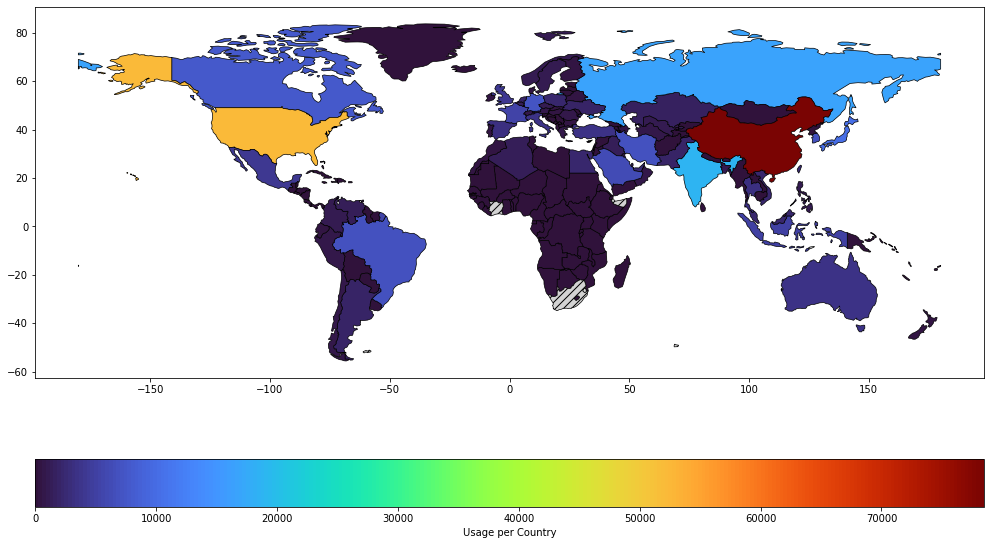

In [17]:
drawMap(countryConsumptionSorted,"Usage per Country")

In [18]:
# import folium
# my_map = folium.Map()
# folium.Choropleth(
#     geo_data=mapTable,
#     name='choropleth',
#     data=mapTable,
#     columns=['country', 'usage'],
#     key_on='feature.properties.name',
#     fill_color='OrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='usage'
# ).add_to(my_map);
# my_map

In [19]:
renewableCSorted = sortDictionary(renewableC,1)
print("Top 20 countries by consumption of Renewable energy:")
for k,v in list(renewableCSorted.items())[:20]:
    print("%-15s" %k,"%s" %round(v,3))

Top 20 countries by consumption of Renewable energy:
China           4702.771
United States   1690.314
Brazil          1140.776
Canada          1041.16
India           672.119
Russia          484.537
Germany         479.605
Japan           390.8
Norway          324.154
Turkey          301.561
France          259.329
Spain           238.826
Italy           221.692
Sweden          213.428
United Kingdom  204.955
Vietnam         173.918
Venezuela       157.058
Mexico          133.29
Australia       128.192
Colombia        128.082


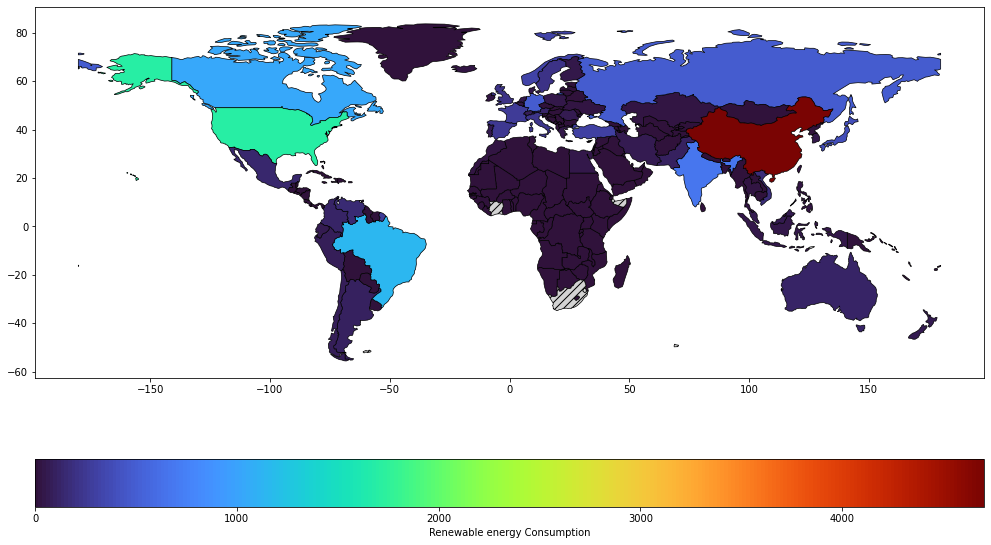

In [20]:
drawMap(renewableCSorted,"Renewable energy Consumption")

In [21]:
cc={}
for c,con in countryConsumptionSorted.items():
    cc[c] = 0.0
    for c1,pop in countryPopulationSorted.items():
        if c==c1:
            if pop!=0:
                cc[c] = round((con*1000000000)/pop,1)
            break
cc = sortDictionary(cc,1)
for k,v in list(cc.items()):
    print("%-35s" %k,"%s" %round(v,3))

Qatar                               396735.9
Singapore                           339449.3
Iceland                             314772.9
Trinidad and Tobago                 284238.0
United Arab Emirates                274634.0
Kuwait                              216254.1
Canada                              210364.3
Norway                              180736.0
Saudi Arabia                        178903.8
Oman                                169064.9
United States                       159204.8
Luxembourg                          147586.0
Australia                           140936.8
Turkmenistan                        135316.9
South Korea                         133473.2
Belgium                             129505.2
Sweden                              120856.1
Russia                              113504.1
Netherlands                         113277.2
Taiwan                              112204.6
Finland                             104777.5
New Zealand                         102073.4
Estonia   

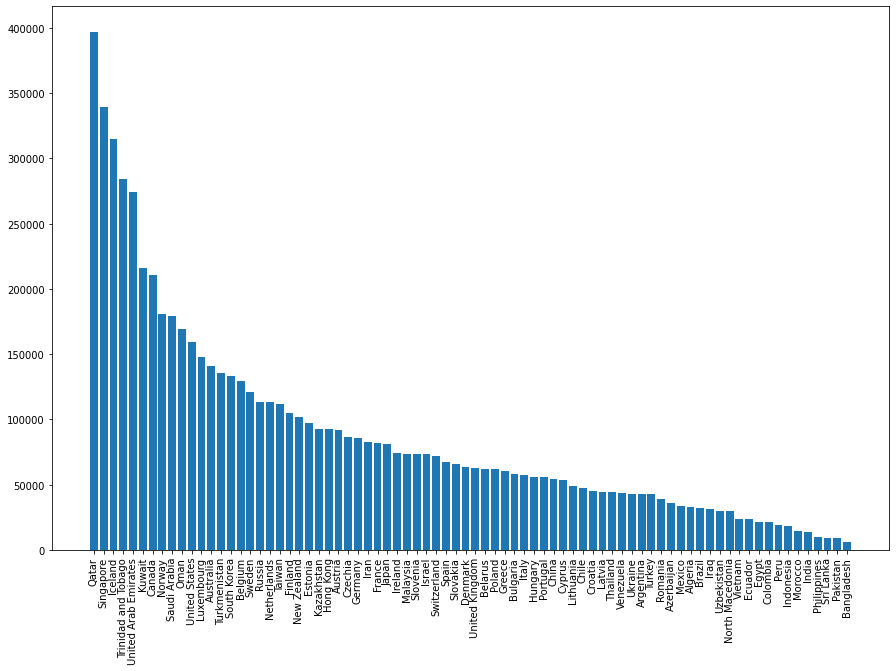

In [22]:
asd = {k:v for k,v in cc.items() if v!=0}
plt.figure(figsize=(15,10))
plt.bar(list(asd.keys()), list(asd.values()))
plt.xticks(rotation=90)
plt.show();

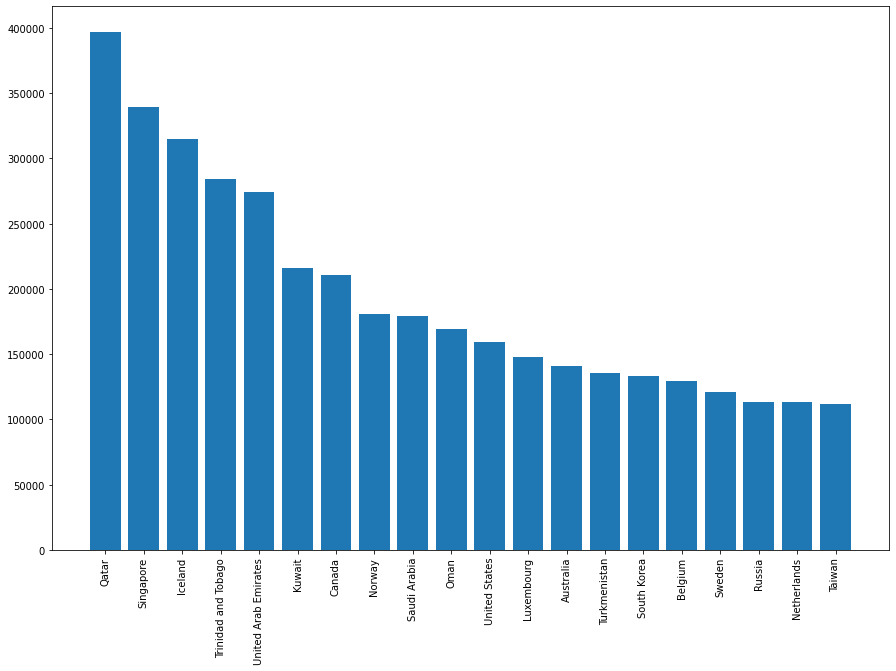

In [23]:
plt.figure(figsize=(15,10))
plt.bar(list(asd.keys())[:20], list(asd.values())[:20])
plt.xticks(rotation=90)
plt.show();

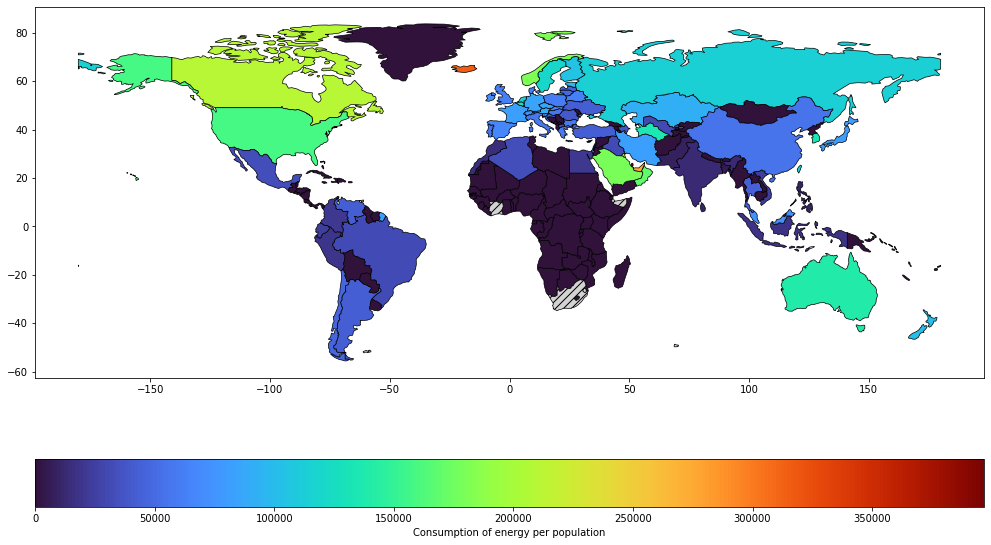

In [24]:
drawMap(cc,"Consumption of energy per population")